# Plumed Analysis Notebook

Using this notebook to visualize and analyze the output from the H-bond metadynamics simulations

In [40]:
import plumed
import signac
import signac_project
import matplotlib.pyplot as plt
import subprocess
import os
plt.rcParams.update({'font.size':9})

kt = 300 * 8.314462618 * 10 ** -3

## Get Signac setup

In [44]:
project = signac.get_project()
df = project.to_dataframe()

In [45]:
status = []
for job in project.find_jobs():
    id = job.get_id()
    status.append(signac_project.check_production_npt_finish(job))
df["Completed"] = status
df

/tmp/ipykernel_138189/3126677164.py:3: DeprecatedWarning: get_id is deprecated as of 1.3 and will be removed in 2.0. Use job.id instead.
  id = job.get_id()


,sp.height,sp.sigma,sp.bf,Completed
c02e02fc746c26c71ef120eab5f1b381,6.25,0.5,200,False
dc1a7066f12e1b9bfb05da40f7cee9d9,12.50,0.4,150,False
eec6493ed9fa66dc0d79ad1f97bd5285,12.50,0.1,200,False
cf003fb6bb5320ded37ca567dc1c102c,12.50,0.3,100,False
f072919244fd739af46ed73dc89b6ce6,12.50,0.1,50,False
8ce1ef4882f82f440905e0befd3913e5,6.25,0.1,300,False
1612459533a5f3b74987dac75479e3ff,12.50,0.2,250,False
3e116dd5fab96ab37031a164d7983eaf,6.25,0.2,200,False
529c45a00af6eb49a9766652f554a6c0,6.25,0.1,200,False
d1114e5f0c144d4ab4dec91669f69226,12.50,0.4,250,False


In [46]:
!python signac_project.py status

Using environment configuration: StandardEnvironment
Fetching labels: 100%|██████████████████████████| 60/60 [00:08<00:00,  7.22it/s]

Overview: 60 jobs/aggregates, 60 jobs/aggregates with eligible operations.

label                        ratio
---------------------------  ----------------------------------------------------------
check_submitted              |████████████████████████████████████████| 60/60 (100.00%)
check_berendsen_npt_finish   |███████████████████████████████████████▎| 59/60 (98.33%)
check_berendsen_npt_start    |███████████████████████████████████████▎| 59/60 (98.33%)
check_berendsen_nvt_finish   |███████████████████████████████████████▎| 59/60 (98.33%)
check_berendsen_nvt_start    |███████████████████████████████████████▎| 59/60 (98.33%)
check_production_npt_start   |████████████████████████████▋           | 43/60 (71.67%)
has_failed_step_files        |██████████████████████████              | 39/60 (65.00%)
check_production_npt_finish  |█▎                        

## Check CV of finished simulations

Using signac we can access simulations that have finished running

In [4]:
# Funciton to plot H-bonds for individual directories
hide_plots = False

def plot_CV_bias(job, filename = "CV_bias_plot.png", dpi=300):
    plt.figure(dpi=dpi)
    data = plumed.read_as_pandas(job.fn("HBOND_SUMS"))
    data_2 = plumed.read_as_pandas(job.fn("HILLS"))
    fig, ax = plt.subplots(6,1, figsize = [12,10])
    ax[0].set_title("SIGMA: " +  str(job.sp.sigma) +  " HEIGHT:" + str(job.sp.height) + " BF:" + str(job.sp.bf))
    ax[0].plot(data.time/1000, data.values[:,1])
    ax[0].set_ylabel("Hydrogen Bond 1")
    ax[1].plot(data.time/1000, data.values[:,2])
    ax[1].set_ylabel("Hydrogen Bond 2")
    ax[2].plot(data.time/1000, data.values[:,3])
    ax[2].set_ylabel("Hydrogen Bond 3")
    ax[3].plot(data.time/1000, data.values[:,4])
    ax[3].set_ylabel("Sum of H-Bonds")
    ax[4].plot(data.time/1000, data.values[:,5],'r')
    ax[4].set_ylabel("Bias Energy")
    ax[4].set_xlabel("Time (ns)")
    ax[5].plot(data_2.time/1000, data_2.values[:,3],'b')
    ax[5].set_ylabel("Gaussian Height")
    ax[5].set_xlabel("Time (ns)")
    if hide_plots:
        plt.close()
    plt.savefig(job.fn(filename))

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/tfobe/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/tfobe/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/tfobe/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/tfobe/anaconda3/envs/plumed/lib/libplumedKernel.so" +++


<Figure size 1920x1440 with 0 Axes>

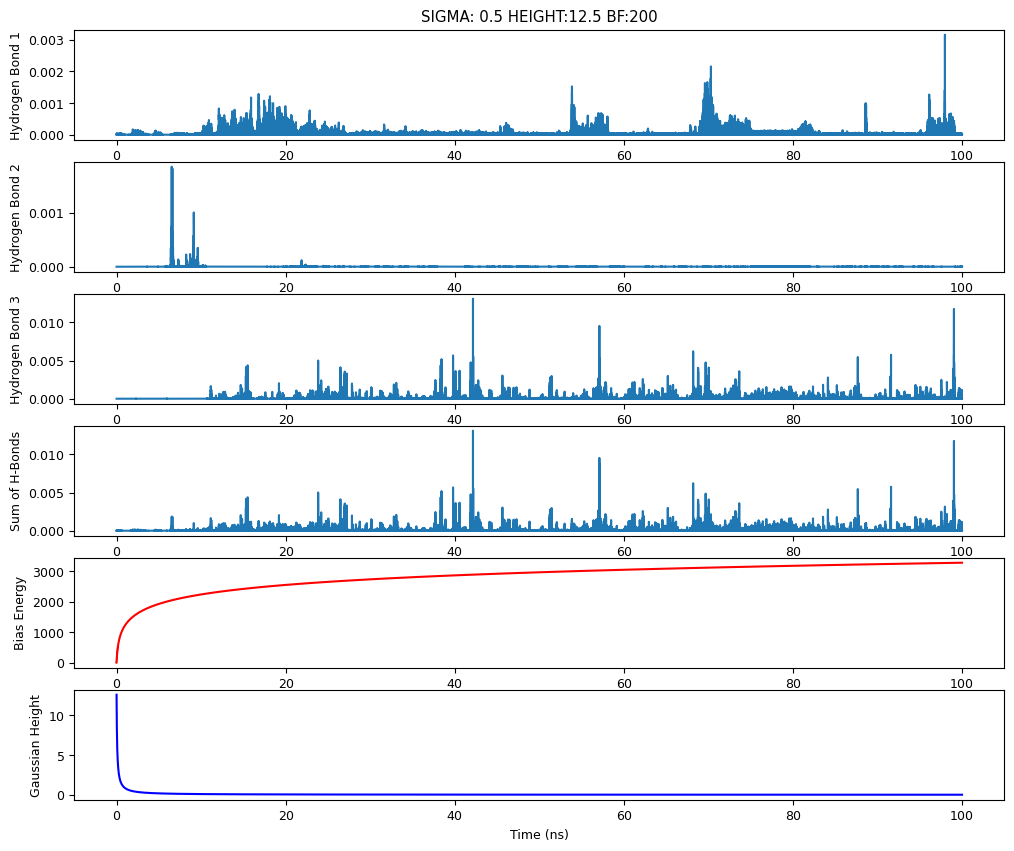

<Figure size 1920x1440 with 0 Axes>

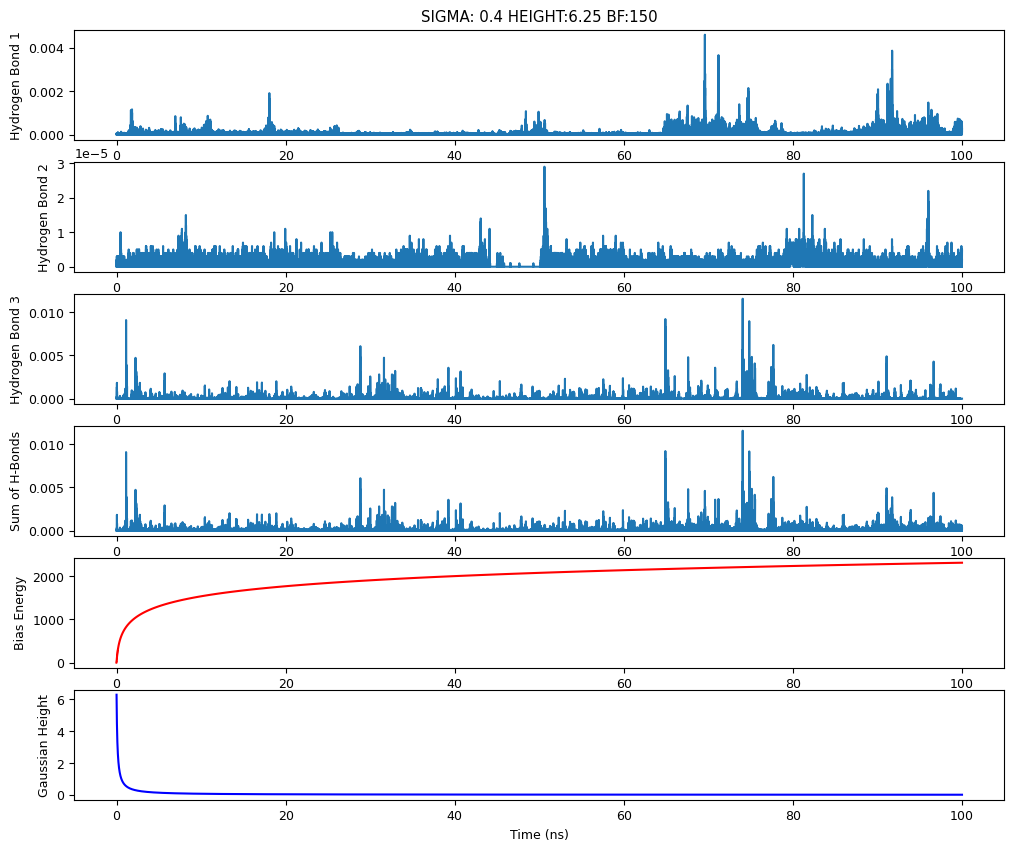

In [13]:
for job in project.find_jobs():
    if signac_project.check_production_npt_finish(job):
        plot_CV_bias(job)  

## Run preliminary free energy calculation

First we can calculate a preliminary FES using the `plumed sum_hills` function.

In [14]:
os.path.abspath("")

'/mnt/bridges2/heteropolymer_simulations/simulations/terphenyl_mop/tetramer_metad/t_300/biased/extended'

In [15]:
current_dir = os.path.abspath("")

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/tfobe/anaconda3/envs/plumed/lib/libplumedKernel.so" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/tfobe/anaconda3/envs/plumed/lib/libplumedKernel.so" +++


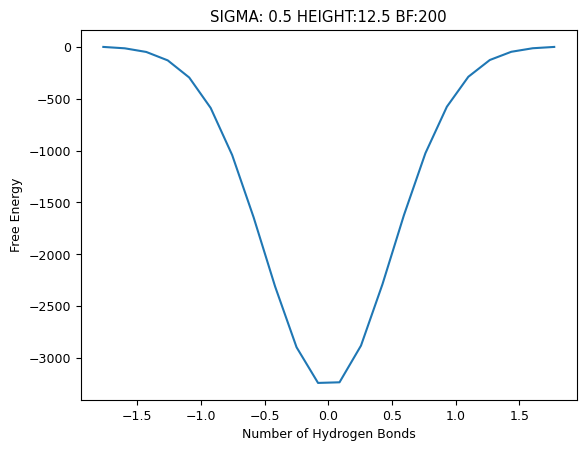

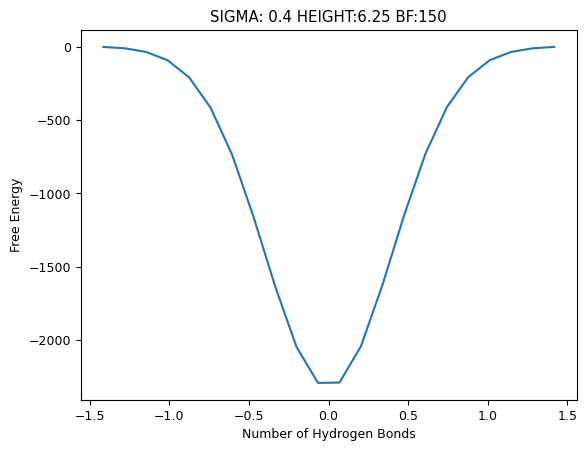

In [16]:
for job in project.find_jobs():
    if signac_project.check_production_npt_finish(job):
        os.chdir(job.fn(""))
        subprocess.run(["plumed", "sum_hills", "--hills", "HILLS", "--kt", str(kt)], stdout=subprocess.DEVNULL) # Silences output from sum_hills
        fes_data = plumed.read_as_pandas("fes.dat")
        plt.figure()
        plt.plot(fes_data.values[:,0], fes_data.values[:,1])
        plt.title("SIGMA: " +  str(job.sp.sigma) +  " HEIGHT:" + str(job.sp.height) + " BF:" + str(job.sp.bf))
        plt.xlabel("Number of Hydrogen Bonds")
        plt.ylabel("Free Energy")
        os.chdir(current_dir)

In [17]:
def calculate_statistical_inefficiency():
    pass

In [18]:
for job in project.find_jobs():
    if signac_project.check_production_npt_finish(job):
        # Calculate

SyntaxError: incomplete input (1637479708.py, line 3)